## Exploratory analysis of VenAnn training data

In [2]:
# download data

!wget https://zenodo.org/records/7636408/files/VegAnn_dataset.zip?download=1 -O VegAnn_dataset.zip

--2024-07-03 14:43:30--  https://zenodo.org/records/7636408/files/VegAnn_dataset.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.98.238, 188.184.103.159, 188.185.79.172, ...
Connecting to zenodo.org (zenodo.org)|188.184.98.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1929390432 (1.8G) [application/octet-stream]
Saving to: ‘VegAnn_dataset.zip’

VegAnn_dataset.zip  100%[===================>]   1.80G  22.2MB/s    in 81s     

2024-07-03 14:44:52 (22.7 MB/s) - ‘VegAnn_dataset.zip’ saved [1929390432/1929390432]



In [3]:
!unzip VegAnn_dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: VegAnn_dataset/annotations/VegAnn_3295.png  
  inflating: VegAnn_dataset/annotations/VegAnn_3296.png  
  inflating: VegAnn_dataset/annotations/VegAnn_3297.png  
  inflating: VegAnn_dataset/annotations/VegAnn_3298.png  
  inflating: VegAnn_dataset/annotations/VegAnn_3299.png  
  inflating: VegAnn_dataset/annotations/VegAnn_33.png  
  inflating: VegAnn_dataset/annotations/VegAnn_330.png  
  inflating: VegAnn_dataset/annotations/VegAnn_3300.png  
  inflating: VegAnn_dataset/annotations/VegAnn_3301.png  
  inflating: VegAnn_dataset/annotations/VegAnn_3302.png  
  inflating: VegAnn_dataset/annotations/VegAnn_3303.png  
  inflating: VegAnn_dataset/annotations/VegAnn_3304.png  
  inflating: VegAnn_dataset/annotations/VegAnn_3305.png  
  inflating: VegAnn_dataset/annotations/VegAnn_3306.png  
  inflating: VegAnn_dataset/annotations/VegAnn_3307.png  
  inflating: VegAnn_dataset/annotations/VegAnn_3308.png  
  inflating: VegAnn_data

In [4]:
!cat VegAnn_dataset/VegAnn_dataset.csv | head

Name;System;Orientation;latitude;longitude;date;LocAcc;Species;Owner;Dataset-Name;TVT-split1;TVT-split2;TVT-split3;TVT-split4;TVT-split5
VegAnn_0.png;Handeld Cameras;Nadir;43.916686;4.879169;2019-06;1;Mix;Arvalis;Literal;Test;Training;Training;Training;Training
VegAnn_1.png;Handeld Cameras;Nadir;43.916686;4.879169;2019-06;1;Mix;Arvalis;Literal;Test;Training;Training;Training;Training
VegAnn_2.png;Handeld Cameras;Nadir;43.916686;4.879169;2019-06;1;Mix;Arvalis;Literal;Test;Training;Training;Training;Training
VegAnn_3.png;Handeld Cameras;Nadir;43.916686;4.879169;2019-06;1;Mix;Arvalis;Literal;Test;Training;Training;Training;Training
VegAnn_4.png;Handeld Cameras;Nadir;43.916686;4.879169;2019-06;1;Mix;Arvalis;Literal;Test;Training;Training;Training;Training
VegAnn_5.png;Handeld Cameras;Nadir;43.916686;4.879169;2019-06;1;Mix;Arvalis;Literal;Test;Training;Training;Training;Training
VegAnn_6.png;Handeld Cameras;Nadir;43.916686;4.879169;2019-06;1;Mix;Arvalis;Literal;Test;Training;Training;Traini

In [5]:
import pandas as pd

VegAnn_metadata_df = pd.read_csv("VegAnn_dataset/VegAnn_dataset.csv", sep=";")
VegAnn_metadata_df.head()

,Name,System,Orientation,latitude,longitude,date,LocAcc,Species,Owner,Dataset-Name,TVT-split1,TVT-split2,TVT-split3,TVT-split4,TVT-split5
0,VegAnn_0.png,Handeld Cameras,Nadir,43.916686,4.879169,2019-06,1,Mix,Arvalis,Literal,Test,Training,Training,Training,Training
1,VegAnn_1.png,Handeld Cameras,Nadir,43.916686,4.879169,2019-06,1,Mix,Arvalis,Literal,Test,Training,Training,Training,Training
2,VegAnn_2.png,Handeld Cameras,Nadir,43.916686,4.879169,2019-06,1,Mix,Arvalis,Literal,Test,Training,Training,Training,Training
3,VegAnn_3.png,Handeld Cameras,Nadir,43.916686,4.879169,2019-06,1,Mix,Arvalis,Literal,Test,Training,Training,Training,Training
4,VegAnn_4.png,Handeld Cameras,Nadir,43.916686,4.879169,2019-06,1,Mix,Arvalis,Literal,Test,Training,Training,Training,Training


In [6]:
print(f"Size of VegAnn dataset = {len(VegAnn_metadata_df)}")

Size of VegAnn dataset = 3775


In [7]:
num_categories = VegAnn_metadata_df['Species'].nunique()
print(f"Number of classes = {num_categories}")

Number of classes = 27


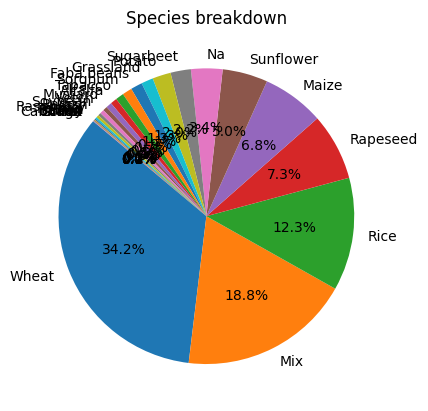

In [8]:
# Distribution of different species

import matplotlib.pyplot as plt

species_counts = VegAnn_metadata_df['Species'].value_counts()

fig, ax = plt.subplots()
ax.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140)
ax.set_title('Species breakdown')

plt.show()

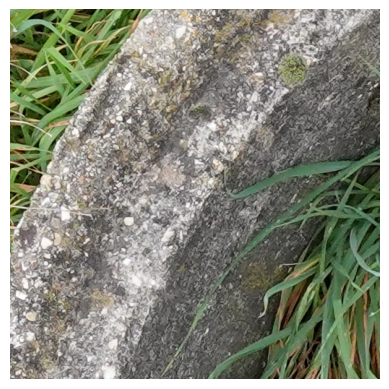

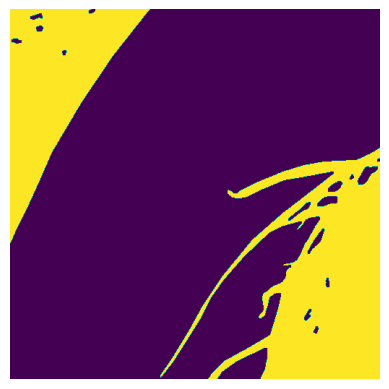

In [9]:
# Show example of 'Mix' image and its annotation

from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_name = "VegAnn_0.png"
image_path = f"VegAnn_dataset/images/{image_name}"
annotation_path = f"VegAnn_dataset/annotations/{image_name}"

for path in [image_path, annotation_path]:

  image = Image.open(path)

  plt.imshow(image)
  plt.axis('off')  # Hide the axes
  plt.show()

In [10]:
# show examples of 'Grassland' images
VegAnn_metadata_df[VegAnn_metadata_df['Species'] == 'Grassland'].head()

,Name,System,Orientation,latitude,longitude,date,LocAcc,Species,Owner,Dataset-Name,TVT-split1,TVT-split2,TVT-split3,TVT-split4,TVT-split5
417,VegAnn_417.png,Handeld Cameras,Nadir,43.916686,4.879169,2018-06,0,Grassland,INRAe,P2S2,Training,Training,Training,Training,Training
436,VegAnn_436.png,Handeld Cameras,Nadir,43.643090,5.025399,2018-05,1,Grassland,INRAe,P2S2,Training,Test,Test,Test,Test
437,VegAnn_437.png,Handeld Cameras,Nadir,43.643090,5.025399,2018-05,1,Grassland,INRAe,P2S2,Training,Test,Test,Test,Test
438,VegAnn_438.png,Handeld Cameras,Nadir,43.600972,4.947580,2018-05,1,Grassland,INRAe,P2S2,Training,Test,Training,Training,Training
439,VegAnn_439.png,Handeld Cameras,Nadir,43.600972,4.947580,2018-05,1,Grassland,INRAe,P2S2,Training,Test,Training,Training,Training


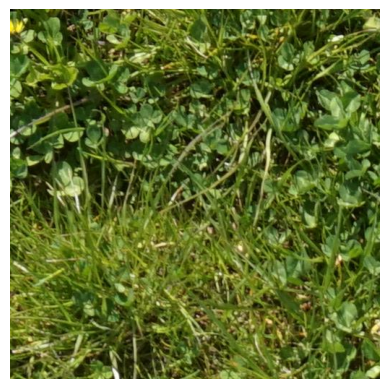

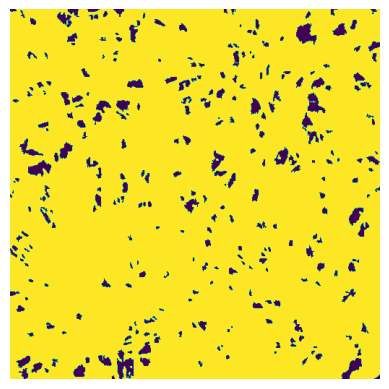

In [11]:
# Show example of grassland image and its annotation

from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_name = "VegAnn_417.png"
image_path = f"VegAnn_dataset/images/{image_name}"
annotation_path = f"VegAnn_dataset/annotations/{image_name}"

for path in [image_path, annotation_path]:

  image = Image.open(path)

  plt.imshow(image)
  plt.axis('off')  # Hide the axes
  plt.show()

In [12]:
# show examples of 'Na' (ie soil) images
VegAnn_metadata_df[VegAnn_metadata_df['Species'] == 'Na'].head()


,Name,System,Orientation,latitude,longitude,date,LocAcc,Species,Owner,Dataset-Name,TVT-split1,TVT-split2,TVT-split3,TVT-split4,TVT-split5
1631,VegAnn_1631.png,Na,Nadir,43.916552,4.878116,2017-06,0,Na,Open,web,Training,Test,Training,Training,Training
1632,VegAnn_1632.png,Na,Nadir,43.916552,4.878116,2017-06,0,Na,Open,web,Validation,Training,Training,Training,Test
1633,VegAnn_1633.png,Na,Nadir,43.916552,4.878116,2017-06,0,Na,Open,web,Training,Training,Training,Training,Training
1634,VegAnn_1634.png,Na,Nadir,43.916552,4.878116,2017-06,0,Na,Open,web,Training,Test,Training,Training,Training
1635,VegAnn_1635.png,Na,Nadir,43.916552,4.878116,2017-06,0,Na,Open,web,Training,Training,Training,Test,Training


In [13]:
print(f"Number of soil images = {len(VegAnn_metadata_df[VegAnn_metadata_df['Species'] == 'Na'])}")

Number of soil images = 130


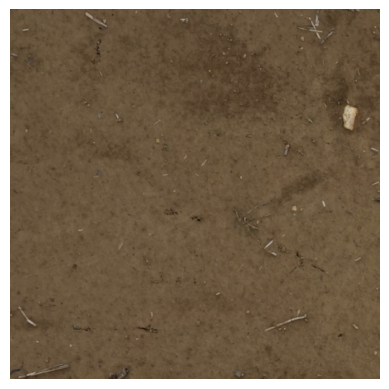

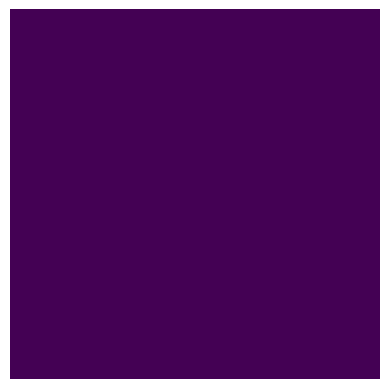

In [14]:
# Show example of 'Na' (soil) image and its annotation

from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_name = "VegAnn_1634.png"
image_path = f"VegAnn_dataset/images/{image_name}"
annotation_path = f"VegAnn_dataset/annotations/{image_name}"

for path in [image_path, annotation_path]:

  image = Image.open(path)

  plt.imshow(image)
  plt.axis('off')  # Hide the axes
  plt.show()